In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from src.settings import PREPROCESSED_DIR, MODELS_DIR, LOGS_DIR

In [3]:
metrics_df_layers5 = pd.read_csv(LOGS_DIR / 'transformer_train_eval_metrics__layers5__20240407_223252f267420.csv')
metrics_df_layers5.tail()

,Epoch,TrainLoss,ValLoss,ValMETEOR,ValBERTScoreAvgF1,ValBERTScoreAvgPrecision,ValBERTScoreAvgRecall,ValTER,ValBLEU
25,26,0.002091,0.723995,0.610740,0.644216,0.536465,0.811304,451.975575,15.538101
26,27,0.001893,0.723658,0.597875,0.644700,0.537979,0.809272,487.648865,14.576091
27,28,0.001675,0.725344,0.590739,0.636405,0.526783,0.808842,505.830495,14.143747
28,29,0.001497,0.725158,0.593535,0.638122,0.528965,0.809437,497.476850,14.342785
29,30,0.001366,0.724890,0.589638,0.635745,0.526377,0.807734,509.205310,14.058414


In [4]:
metrics_df_layers10 = pd.read_csv(LOGS_DIR / 'transformer_train_eval_metrics__layers10__20240408_103247f621957.csv')
metrics_df_layers10.tail()

,Epoch,TrainLoss,ValLoss,ValMETEOR,ValBERTScoreAvgF1,ValBERTScoreAvgPrecision,ValBERTScoreAvgRecall,ValTER,ValBLEU
25,26,0.001667,0.715300,0.556195,0.668260,0.564797,0.821442,437.646194,12.106936
26,27,0.001512,0.715860,0.552077,0.667355,0.562883,0.822881,379.099136,11.906362
27,28,0.001349,0.716393,0.546635,0.671303,0.567754,0.824354,456.333458,11.600868
28,29,0.001229,0.716214,0.545476,0.673376,0.570102,0.825590,485.974317,11.545611
29,30,0.001114,0.715129,0.546409,0.672568,0.569503,0.824294,404.221006,11.606335


In [18]:
def plot_dashboard(metrics_df, title):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    fig.suptitle(title)

    # Loss
    sns.lineplot(data=metrics_df, x="Epoch", y="TrainLoss", label="Training", ax=ax1)
    sns.lineplot(data=metrics_df, x="Epoch", y="ValLoss", label="Validation", ax=ax1)
    ax1.grid(alpha=0.3)
    ax1.set_ylabel("Loss")


    # METEOR, TER, BERTScore
    color1 = sns.color_palette("Paired")[1]
    color2 = sns.color_palette("Paired")[3]
    color3 = sns.color_palette("Paired")[5]
    sns.lineplot(
        data=metrics_df,
        x="Epoch",
        y="ValMETEOR",
        ax=ax2,
        label="METEOR",
        color=color1,
        legend=False,
    )
    sns.lineplot(
        data=metrics_df,
        x="Epoch",
        y="ValBERTScoreAvgF1",
        ax=ax2,
        label="BERTScore Avg F1",
        color=color2,
        legend=False,
    )
    ax2_twin = ax2.twinx()
    sns.lineplot(
        data=metrics_df,
        x="Epoch",
        y="ValTER",
        ax=ax2_twin,
        label="TER",
        color=color3,
    )
    ax2.set_ylim(0, 1)
    ax2.set_ylabel('Value')
    ax2.set_xlabel('Epochs')
    ax2_twin.set_ylabel("")
    lines, labels = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_twin.get_legend_handles_labels()
    ax2_twin.legend(lines + lines2, labels + labels2, loc='lower right')

    # BLEU
    threshold_colors = ["#DB2418", "#C53D16", "#C63C16", "#A05917", "#817B18", "#43C222", "#29F52D"]
    threshold_values = [10, 19, 29, 40, 50, 60, 65]
    threshold_labels = [
        "Almost useless",
        "Hard to get the gist",
        "The gist is clear, but has\nsignificant grammatical errors",
        "Understandable to good translations",
        "High quality translations",
        "Very high quality, adequate,\nand fluent translations",
        "Quality often better than human",
    ]

    sns.lineplot(data=metrics_df, x="Epoch", y="ValBLEU", ax=ax3)
    ax3.set_ylim(0, threshold_values[-1] + 2)
    ax3.set_ylabel("BLEU")

    for threshold, color, label in zip(threshold_values, threshold_colors, threshold_labels):
        if threshold != 65:
            ax3.hlines(threshold, 0, len(metrics_df), linestyles="--", colors=color, alpha=0.5)
        ax3.text(len(metrics_df) + 2, (threshold - 3) if threshold != 65 else threshold, label, color=color, va="center")

    # Show dashboard
    plt.tight_layout()
    plt.show()


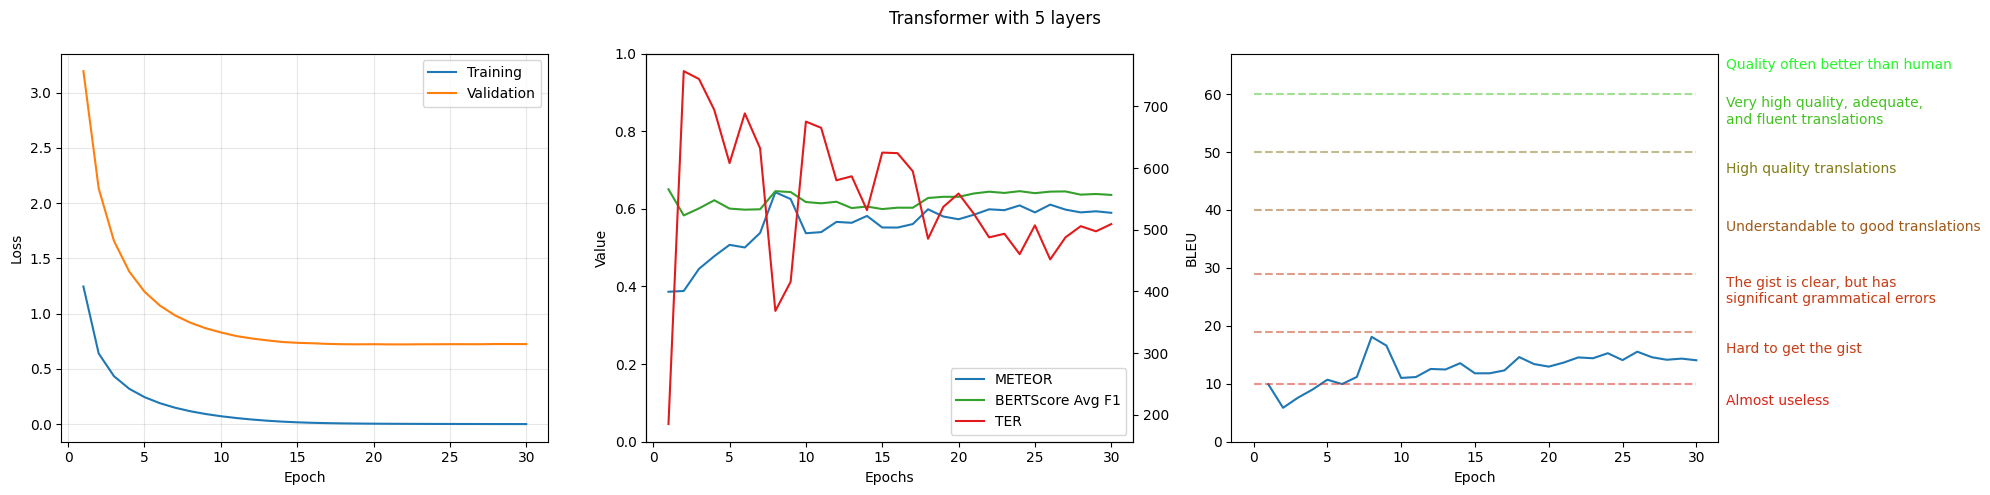

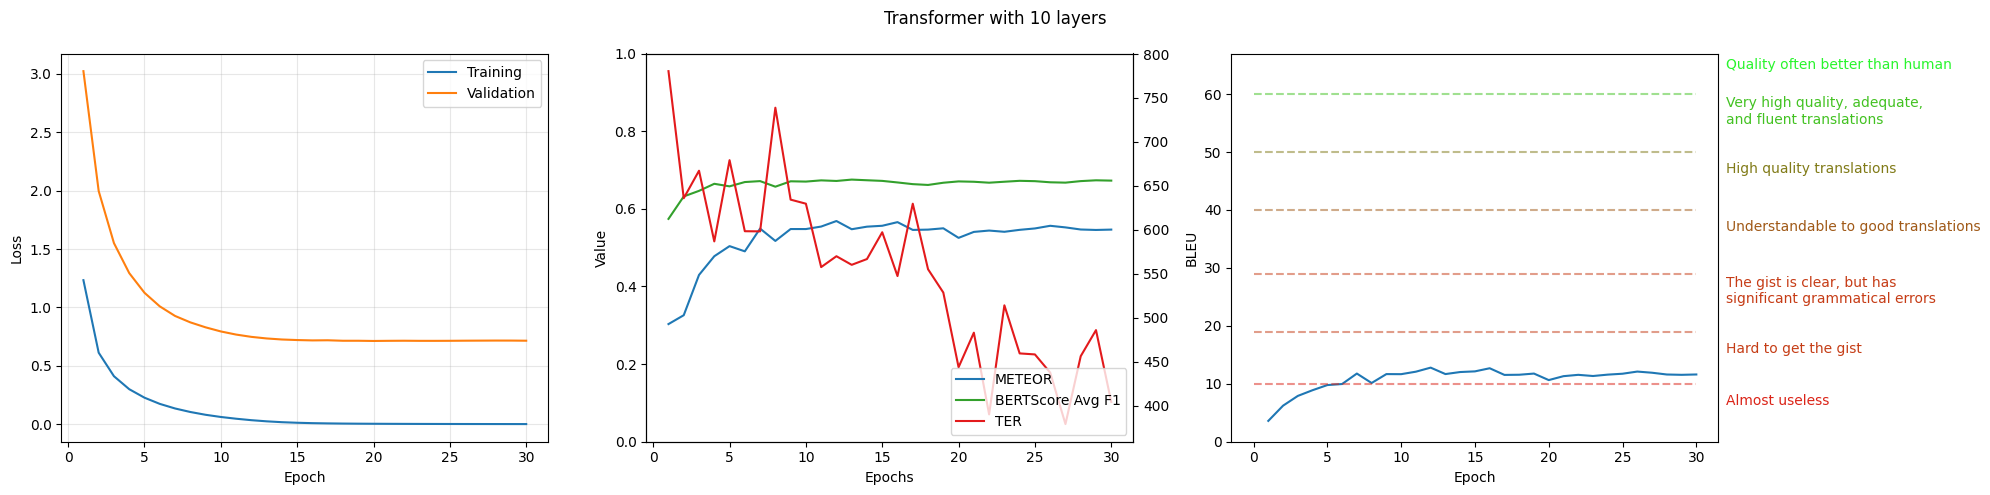

In [20]:
plot_dashboard(metrics_df_layers5, title="Transformer with 5 layers")
plot_dashboard(metrics_df_layers10, title="Transformer with 10 layers")

In [ ]:
threshold_colors = ["#DB2418", "#C53D16", "#C63C16", "#A05917", "#817B18", "#43C222", "#29F52D"]
threshold_values = [10, 19, 29, 40, 50, 60, 65]
threshold_labels = [
    "Almost useless",
    "Hard to get the gist",
    "The gist is clear, but has\nsignificant grammatical errors",
    "Understandable to good translations",
    "High quality translations",
    "Very high quality, adequate,\nand fluent translations",
    "Quality often better than human",
]

plt.figure(figsize=(10, 5))
sns.lineplot(data=metrics_df, x="Epoch", y="ValBLEU")
plt.ylim(0, threshold_values[-1] + 2)
plt.ylabel("BLEU")

for threshold, color, label in zip(threshold_values, threshold_colors, threshold_labels):
    if threshold != 65:
        plt.hlines(threshold, 0, len(metrics_df), linestyles="--", colors=color, alpha=0.5)
    plt.text(len(metrics_df) + 2, (threshold - 3) if threshold != 65 else threshold, label, color=color, va="center")

plt.tight_layout()
plt.show()